In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
df_tesla = pdr.get_data_yahoo("TSLA")

In [5]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-25,69.120003,66.830002,69.000000,67.919998,34946000.0,67.919998
2017-07-26,69.099998,67.624001,68.071999,68.769997,24104000.0,68.769997
2017-07-27,69.500000,65.258003,69.199997,66.891998,41512000.0,66.891998
2017-07-28,67.919998,66.501999,67.377998,67.014000,24402000.0,67.014000
2017-07-31,68.297997,64.208000,67.099998,64.694000,42675500.0,64.694000
...,...,...,...,...,...,...
2022-07-18,751.549988,718.809998,734.809998,721.640015,27512500.0,721.640015
2022-07-19,741.419983,710.929993,735.000000,736.590027,26963400.0,736.590027
2022-07-20,751.989990,730.450012,740.349976,742.500000,29621400.0,742.500000


# Simple Moving Average

<AxesSubplot:xlabel='Date'>

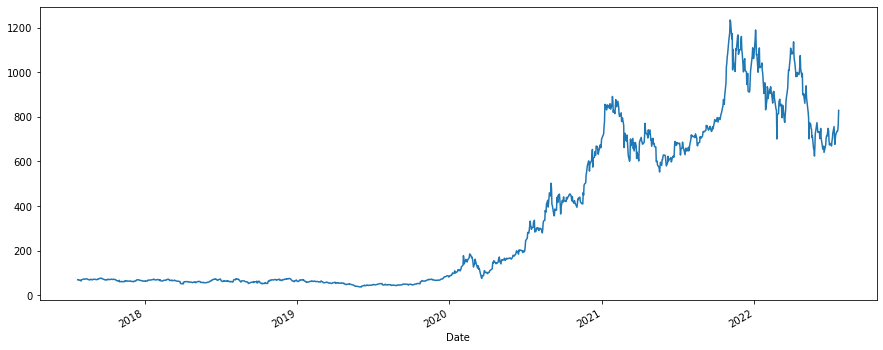

In [7]:
df_tesla['Open'].plot(figsize=(15,6))

In [8]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

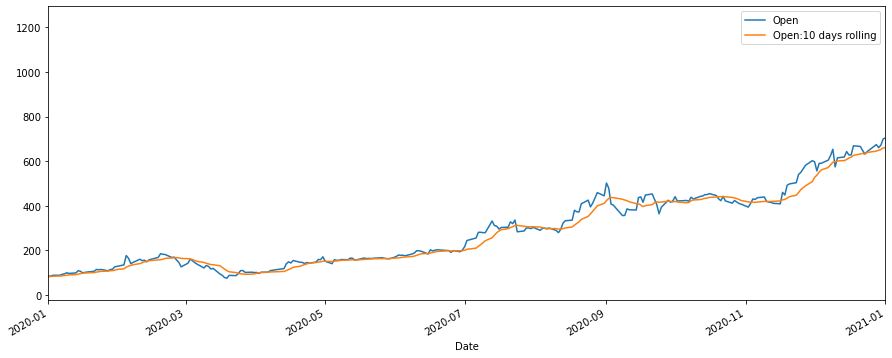

In [12]:
df_tesla[['Open', 'Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [13]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window=50, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

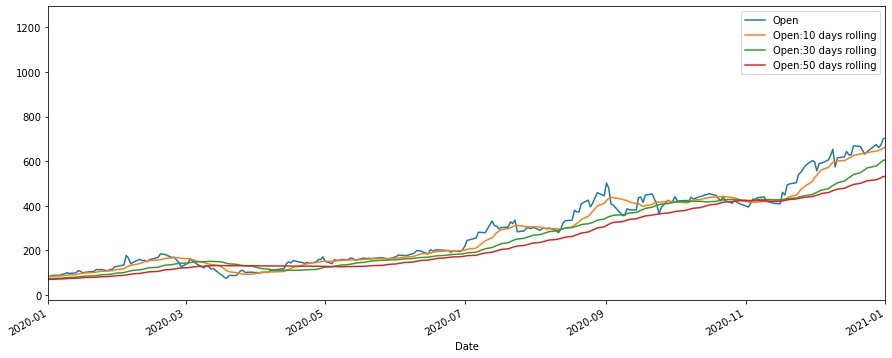

In [14]:
df_tesla[['Open', 'Open:10 days rolling', 'Open:30 days rolling', 'Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

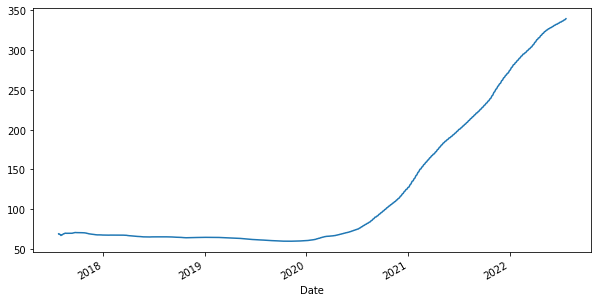

In [17]:
## Expanding
## Cumalative Moving average(CMA) 
    
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

## EWMA - Exponential Moving Average

In [18]:
df_tesla.to_csv('sahre.csv')

In [19]:
# EMA tesla shares
# Lets smooting factor - 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

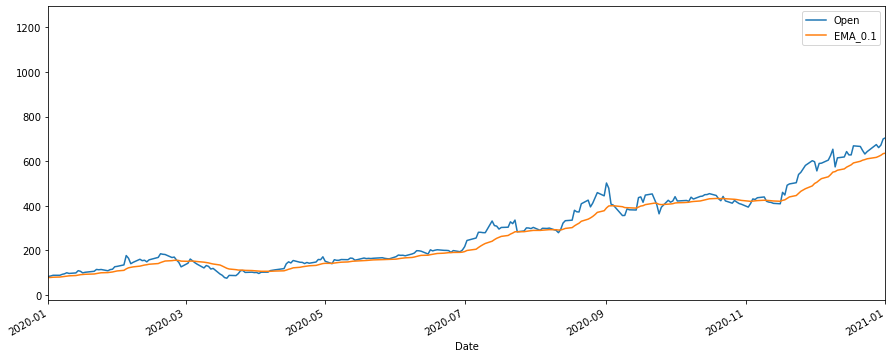

In [20]:
df_tesla[['Open', 'EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [21]:
# EMA tesla shares
# Lets smooting factor - 0.1
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

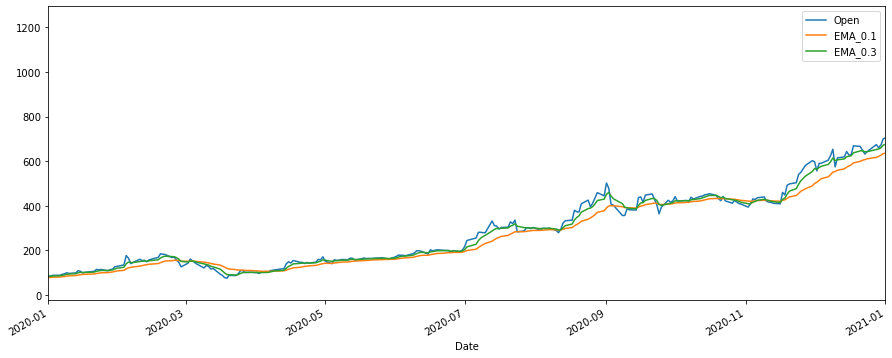

In [22]:
df_tesla[['Open', 'EMA_0.1', 'EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [23]:
# EWMA tesla shares

df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

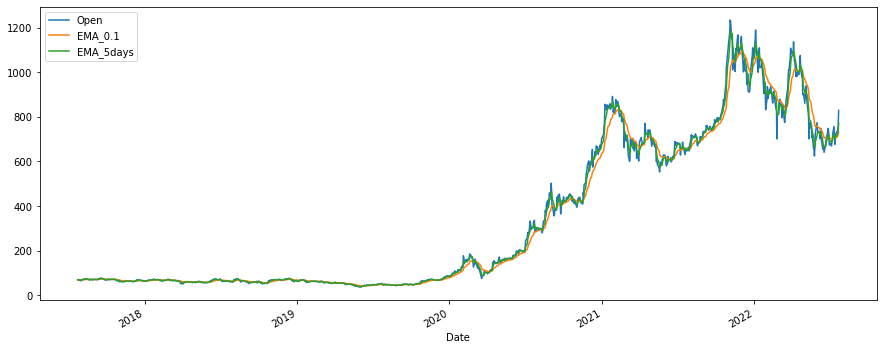

In [25]:
df_tesla[['Open', 'EMA_0.1', 'EMA_5days']].plot(figsize=(15,6))